## Importing modules

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visual exploratory data analysis

## pandas line plots

In the previous chapter, you saw that the .plot() method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from [Yahoo Finance](https://finance.yahoo.com/). Your job is to plot the 'Month' column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as df. Explore it using methods such as .head(), .info(), and .describe() to see the column names.

In [95]:
stock_data = {'AAPL': {0: 117.160004,   1: 128.46000700000002,   2: 124.43000000000001,   3: 125.150002,   4: 130.279999,   
                   5: 125.43000000000001,   6: 121.300003,   7: 112.760002,   8: 110.300003,   9: 119.5,   
                   10: 118.300003,   11: 105.260002},  
          'GOOG': {0: 534.52244500000018,   1: 558.402511,  2: 548.00246800000002,   3: 537.34002699999996,   
                   4: 532.10998499999982,   5: 520.51000999999997,   6: 625.60998499999982,   7: 618.25,   
                   8: 608.419983,   9: 710.80999800000018,   10: 742.59997599999997,   11: 758.88000499999998},  
          'IBM': {0: 153.30999800000001,   1: 161.94000199999999,   2: 160.5,   3: 171.28999299999995,   
                  4: 169.64999399999999,   5: 162.66000399999999,   6: 161.990005,   7: 147.88999899999999,  
                  8: 144.970001,   9: 140.08000200000001,   10: 139.41999799999999,   11: 137.61999499999999},  
          'Month': {0: 'Jan',   1: 'Feb',   2: 'Mar',   3: 'Apr',   4: 'May',   5: 'Jun',   6: 'Jul',   
                    7: 'Aug',   8: 'Sep',   9: 'Oct',   10: 'Nov',   11: 'Dec'}}

df = pd.DataFrame(stock_data)
df

,AAPL,GOOG,IBM,Month
0,117.160004,534.522445,153.309998,Jan
1,128.460007,558.402511,161.940002,Feb
2,124.430000,548.002468,160.500000,Mar
3,125.150002,537.340027,171.289993,Apr
4,130.279999,532.109985,169.649994,May
5,125.430000,520.510010,162.660004,Jun
6,121.300003,625.609985,161.990005,Jul
7,112.760002,618.250000,147.889999,Aug
8,110.300003,608.419983,144.970001,Sep
9,119.500000,710.809998,140.080002,Oct


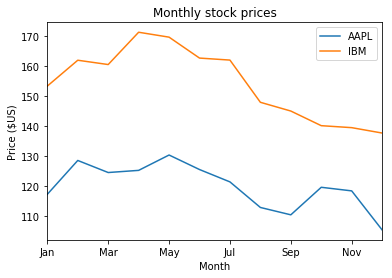

In [96]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL','IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

It looks like the monthly stock prices of both AAPL and IBM peaked early in the year before falling

## pandas scatter plots

Pandas scatter plots are generated using the kind='scatter' keyword argument. Scatter plots require that the x and y columns be chosen by specifying the x and y parameters inside .plot(). Scatter plots also take an s keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The size of each circle is provided as a NumPy array called sizes. This array contains the normalized 'weight' of each automobile in the dataset.

In [97]:
df = pd.read_csv('auto-mpg.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null int64
origin    392 non-null object
name      392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 27.6+ KB
None


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [98]:
sizes = np.array([ 51.12044694, 56.78387977, 49.15557238, 49.06977358, 49.52823321, 78.4595872, 78.93021696, 77.41479205, 81.52541106, 61.71459825, 52.85646225, 54.23007578, 58.89427963, 39.65137852, 23.42587473, 33.41639502, 32.03903011, 27.8650165, 18.88972581, 14.0196956, 29.72619722, 24.58549713, 23.48516821, 20.77938954, 29.19459189, 88.67676838, 79.72987328, 79.94866084, 93.23005042, 18.88972581, 21.34122243, 20.6679223, 28.88670381, 49.24144612, 46.14174741, 45.39631334, 45.01218186, 73.76057586, 82.96880195, 71.84547684, 69.85320595, 102.22421043, 93.78252358, 110. , 36.52889673, 24.14234281, 44.84805372, 41.02504618, 20.51976563, 18.765772 , 17.9095202, 17.75442285, 13.08832041, 10.83266174, 14.00441945, 15.91328975, 21.60597587, 18.8188451, 21.15311208, 24.14234281, 20.63083317, 76.05635059, 80.05816704, 71.18975117, 70.98330444, 56.13992036, 89.36985382, 84.38736544, 82.6716892, 81.4149056, 22.60363518, 63.06844313, 69.92143863, 76.76982089, 69.2066568, 35.81711267, 26.25184749, 36.94940537, 19.95069229, 23.88237331, 21.79608472, 26.1474042, 19.49759118, 18.36136808, 69.98970461, 56.13992036, 66.21810474, 68.02351436, 59.39644014, 102.10046481, 82.96880195, 79.25686195, 74.74521151, 93.34830013, 102.05923292, 60.7883734, 40.55589449, 44.7388015, 36.11079464, 37.9986264, 35.11233175, 15.83199594, 103.96451839, 100.21241654, 90.18186347, 84.27493641, 32.38645967, 21.62494928, 24.00218436, 23.56434276, 18.78345471, 22.21725537, 25.44271071, 21.36007926, 69.37650986, 76.19877818, 14.51292942, 19.38962134, 27.75740889, 34.24717407, 48.10262495, 29.459795 , 32.80584831, 55.89556844, 40.06360581, 35.03982309, 46.33599903, 15.83199594, 25.01226779, 14.03498009, 26.90404245, 59.52231336, 54.92349014, 54.35035315, 71.39649768, 91.93424995, 82.70879915, 89.56285636, 75.45251972, 20.50128352, 16.04379287, 22.02531454, 11.32159874, 16.70430249, 18.80114574, 18.50153068, 21.00322336, 25.79385418, 23.80266582, 16.65430211, 44.35746794, 49.815853 , 49.04119063, 41.52318884, 90.72524338, 82.07906251, 84.23747672, 90.29816462, 63.55551901, 63.23059357, 57.92740995, 59.64831981, 38.45278922, 43.19643409, 41.81296121, 19.62393488, 28.99647648, 35.35456858, 27.97283229, 30.39744886, 20.57526193, 26.96758278, 37.07354237, 15.62160631, 42.92863291, 30.21771564, 36.40567571, 36.11079464, 29.70395123, 13.41514444, 25.27829944, 20.51976563, 27.54281821, 21.17188565, 20.18836167, 73.97101962, 73.09614831, 65.35749368, 73.97101962, 43.51889468, 46.80945169, 37.77255674, 39.6256851, 17.24230306, 19.49759118, 15.62160631, 13.41514444, 55.49963323, 53.18333207, 55.31736854, 42.44868923, 13.86730874, 16.48817545, 19.33574884, 27.3931002, 41.31307817, 64.63368105, 44.52069676, 35.74387954, 60.75655952, 79.87569835, 68.46177648, 62.35745431, 58.70651902, 17.41217694, 19.33574884, 13.86730874, 22.02531454, 15.75091031, 62.68013142, 68.63071356, 71.36201911, 76.80558184, 51.58836621, 48.84134317, 54.86301837, 51.73502816, 74.14661842, 72.22648148, 77.88228247, 78.24284811, 15.67003285, 31.25845963, 21.36007926, 31.60164234, 17.51450098, 17.92679488, 16.40542438, 19.96892459, 32.99310928, 28.14577056, 30.80379718, 16.40542438, 13.48998471, 16.40542438, 17.84050478, 13.48998471, 47.1451025, 58.08281541, 53.06435374, 52.02897659, 41.44433489, 36.60292926, 30.80379718, 48.98404972, 42.90189859, 47.56635225, 39.24128299, 54.56115914, 48.41447259, 48.84134317, 49.41341845, 42.76835191, 69.30854366, 19.33574884, 27.28640858, 22.02531454, 20.70504474, 26.33555201, 31.37264569, 33.93740821, 24.08222494, 33.34566004, 41.05118927, 32.52595611, 48.41447259, 16.48817545, 18.97851406, 43.84255439, 37.22278157, 34.77459916, 44.38465193, 47.00510227, 61.39441929, 57.77221268, 65.12675249, 61.07507305, 79.14790534, 68.42801405, 54.10993164, 64.63368105, 15.42864956, 16.24054679, 15.26876826, 29.68171358, 51.88189829, 63.32798377, 42.36896092, 48.6988448, 20.15170555, 19.24612787, 16.98905358, 18.88972581, 29.68171358, 28.03762169, 30.35246559, 27.20120517, 19.13885751, 16.12562794, 18.71277385, 16.9722369, 29.85984799, 34.29495526, 37.54716158, 47.59450219, 19.93246832, 30.60028577, 26.90404245, 24.66650366, 21.36007926, 18.5366546, 32.64243213, 18.5366546, 18.09999962, 22.70075058, 36.23351603, 43.97776651, 14.24983724, 19.15671509, 14.17291518, 35.25757392, 24.38356372, 26.02234705, 21.83420642, 25.81458463, 28.90864169, 28.58044785, 30.91715052, 23.6833544, 12.82391671, 14.63757021, 12.89709155, 17.75442285, 16.24054679, 17.49742615, 16.40542438, 20.42743834, 17.41217694, 23.58415722, 19.96892459, 20.33531923, 22.99334585, 28.47146626, 28.90864169, 43.43816712, 41.57579979, 35.01567018, 35.74387954, 48.5565546, 57.77221268, 38.98605581, 49.98882458, 28.25412762, 29.01845599, 23.88237331, 27.60710798, 26.54539622, 31.14448175, 34.17556473, 16.3228815, 17.0732619, 16.15842026, 18.80114574, 18.80114574, 19.42557798, 20.2434083, 20.98452475, 16.07650192, 16.07650192, 16.57113469, 36.11079464, 37.84783835, 27.82194848, 33.46359332, 29.5706502, 23.38638738, 36.23351603, 32.40968826, 18.88972581, 21.92965639, 28.68963762, 30.80379718])

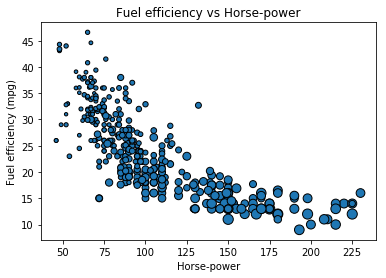

In [99]:
# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes, edgecolor='k')

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

As you would expect, automobiles with higher horsepower are less fuel efficient.

## pandas box plots

While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The .plot() method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify subplots=True inside .plot() to generate two separate plots.

All necessary modules have been imported and the automobiles dataset is available in the workspace as df.

Sometimes, two columns cannot be plotted together because their units do not match. The .plot() method can generate subplots for each column being plotted. Specify subplots=True inside .plot() to generate two separate plots

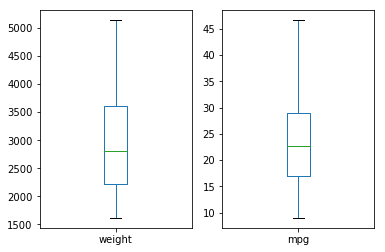

In [100]:
# Make a list of the column names to be plotted: cols
cols = ['weight','mpg']

# Generate the box plots
df[cols].plot(kind='box',subplots=True)

# Display the plot
plt.show()

## pandas hist, pdf and cdf

Pandas relies on the .hist() method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the [Seaborn package](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

Your job is to plot a PDF and CDF for the fraction column of the tips dataset. This column contains information about what fraction of the total bill comprised of the tip.

Remember, when plotting the PDF, you need to specify normed=True in your call to .hist(), and when plotting the CDF, you need to specify cumulative=True in addition to normed=True.

All necessary modules have been imported and the tips dataset is available in the workspace as df. Also, some formatting code has been written so that the plots you generate will appear on separate rows.

In [101]:
tips = pd.read_csv('tips_pd.csv')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
fraction      244 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.3+ KB


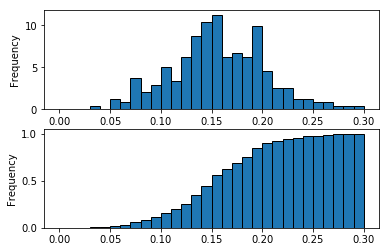

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=1)  # This formats the plots such that they appear on separate rows

# Plot the pdf
tips.fraction.plot(ax=axes[0], kind='hist', normed=True, bins=30, range=(0,.3), edgecolor='black')  # Plot the PDF

# plot the cdf
tips.fraction.plot(ax=axes[1], kind='hist', cumulative=True, normed=True, bins=30, range=(0,.3), edgecolor='black')  
plt.show()

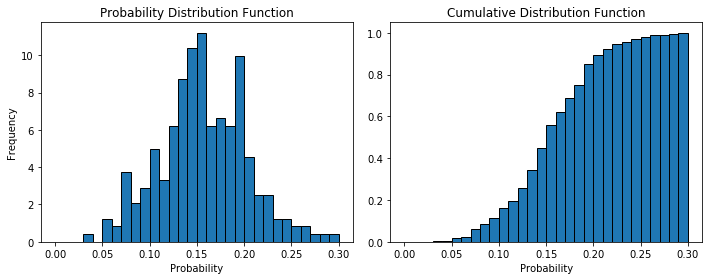

In [103]:
# Plotting the same data in columns rather than rows

#fig, axes = plt.subplots(nrows=2, ncols=1)  # This formats the plots such that they appear on separate rows

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.hist(tips['fraction'], normed=True, bins=30, range=(0,.3), edgecolor='black')
ax1.set_title('Probability Distribution Function')
ax1.set_xlabel('Probability')
ax1.set_ylabel('Frequency')

ax2.hist(tips['fraction'], cumulative=True, normed=True, bins=30, range=(0,.3), edgecolor='black')
ax2.set_title('Cumulative Distribution Function')
ax2.set_xlabel('Probability')

plt.tight_layout()
plt.show()


In [104]:
plt.subplot(1, 2, 2)
plt.hist(ax=axes[1], tips['fraction'], cumulative=True, normed=True, bins=30, range=(0,.3), edgecolor='black')
plt.title('Cumulative Distribution Function')
plt.xlabel('Probability')

plt.tight_layout()
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-104-ad15264a037a>, line 2)

# Statistical exploratory data analysis

## Bachelor's degrees awarded to women

In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the [Digest of Education Statistics](nces.ed.gov/programs/digest/2013menu_tables.asp).

Your job is to compute the minimum and maximum values of the 'Engineering' column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the .mean() method with the keyword argument axis='columns'. This computes the mean across all columns per row.

The DataFrame has been pre-loaded for you as df with the index set to 'Year'.

In [ ]:
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col=0)
print(df.info())
print()
print(df.describe())
print()
df.head()

In [ ]:
# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

It looks like there has generally been an upward trend since 1970.

In [ ]:
# It is possible to compare the trends for different subjects by using subplots

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14.5,3.5))

mean = df.mean(axis='columns')
ax1.plot(mean)  
ax1.set_title('Total')

ax2.plot(df['Education'])
ax2.set_title('Education')

ax3.plot(df['Engineering'])
ax3.set_title('Engineering')

plt.show()

## Median vs mean

In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
print(titanic.fare.describe())

titanic.fare.plot(kind='box')  # Generate a box plot of the fare column
plt.show()

Here you can see why the median is a more informative statistic in the presence of outliers

## Quantiles

In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from [Gapminder](https://docs.google.com/spreadsheets/d/1dgOdlUEq6_V55OHZCxz5BG_0uoghJTeA6f83br5peNs/pub?range=A1:D70&gid=1&output=html).

First, you will determine the number of countries reported in 2015. There are a total of 206 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

* [df.quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)

In [ ]:
df = pd.read_csv('life_expectancy_at_birth.csv', index_col=0)
df.head()

In [ ]:
print(df['2015'].count())  # Print the number of countries reported in 2015
print(df.quantile([0.05, 0.95]))  # Print the 5th and 95th percentiles

years = ['1800','1850','1900','1950','2000']  # Generate a box plot
df[years].plot(kind='box')
plt.show()

It looks like overall, life expectancy has steadily increased since 1900

## Standard deviation of temperature

Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from [Weather Underground](https://www.wunderground.com/history/).

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

The DataFrames have been pre-loaded for you as january, which contains the January data, and march, which contains the March data.

In [ ]:
january = pd.read_csv('january.csv', index_col=0)
march = pd.read_csv('march.csv', index_col=0)


print('Jan mean:',january.mean())  # Print the mean of the January and March data
print()
print('March mean:',march.mean())
print('\n')
print('Jan std:',january.std())  # Print the standard deviation of the January and March data
print()
print('March std:',march.std())

# Separating populations with Boolean indexing

Sometimes it is necessary to separate populations to get a more accurate read of the data. Look at the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), for example (obtained [here](https://gist.github.com/curran/a08a1080b88344b0c8a7)), a multivariate dataset dealing with flowers.

* [df.unique](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html)

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

The species column is categorical, and implies that the different data series within the dataframe may differ by ttype

In [ ]:
print(iris['species'].describe())
print()
print(iris['species'].unique())

There are 150 enties, with 3 unique species (the top occuring species has 50 counts - but in this case, they are tied - all have 50)
The three species are setosa, versicolor, and virginica

In [ ]:
# We can make new dataframes by extracting the unique values from the species column

indices = iris['species'] == 'setosa'  # subset of iris where species = setosa
setosa = iris.loc[indices,:]  # New DataFrame composed of this subset

indices = iris['species'] == 'versicolor'  
versicolor = iris.loc[indices,:] 

indices = iris['species'] == 'virginica'
virginica = iris.loc[indices,:] 


In [ ]:

# Check what unique values exist in the new dataframes' species columns
print(setosa['species'].unique())
print(versicolor['species'].unique())
print(virginica['species'].unique())

# So we can can delete the 'species' column given that each will have only one species in it
del setosa['species'], versicolor['species'], virginica['species']


In [ ]:
# Note that in this case, the indexes are consecutive. Versicolor starts at 50 and stops at 99. 
# Usually, categories will not be so neatly ordered, and we will learn later how to deal with this

print(setosa.head(2))
print()
print(versicolor.head(2))
print()
print(virginica.head(2))


In [ ]:
# Plotting a histogram with the different species leads to much overlap and lack of clarity

iris.plot(kind= 'hist', bins=50, range=(0,8), alpha=0.3, edgecolor='black')
plt.title('Entire iris data set')
plt.xlabel('[cm]')
plt.show()


In [ ]:
# Doing this separately for the different species increases visual clarity
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14.5,3.5))

setosa.plot(ax=ax1, kind='hist', bins=50, range=(0,8), alpha=0.3)

ax1.set_title('Setosa data set')
ax1.set_title('Setosa data set')
ax1.set_xlabel('[cm]')

versicolor.plot(ax=ax2, kind='hist', bins=50, range=(0,8), alpha=0.3)
ax2.set_title('Versicolor data set')
ax2.set_xlabel('[cm]')

virginica.plot(ax=ax3, kind='hist', bins=50, range=(0,8), alpha=0.3)
ax3.set_title('Virginica data set')
ax3.set_xlabel('[cm]')

plt.show()


In [ ]:
# Describing the entire dataframe versus the individual factors leads to quantiative errors. 

describe_all = iris.describe()
print(describe_all)

In [ ]:
# To demonstrate this, we create a describe for each factor then see how much this differs from the 
# entire dataset describe

describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

In [ ]:
# We calcualte the difference of the descriptive statistics from the entire dataset as a proportion of the 
# factor statistic. This is (absolute(dataset = factor)*100 / factor)

error_setosa = 100 * np.abs(describe_setosa - describe_all)
error_setosa = error_setosa/describe_setosa

error_versicolor = 100 * np.abs(describe_versicolor - describe_all)
error_versicolor = error_versicolor/describe_versicolor

error_virginica = 100 * np.abs(describe_virginica - describe_all)
error_virginica = error_virginica/describe_virginica


In [ ]:
print(error_setosa)

## Separate and summarize

Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.


In [ ]:
# Load the data
df = pd.read_csv('auto-mpg.csv')

# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = auto.mean()
global_std = auto.std()

us = auto[auto['origin'] == 'US']  # Filter the US population from the origin column: us

us_mean = us.mean()  # Compute the US mean and US standard deviation: us_mean, us_std
us_std = us.std()

print('Mean difference')
print(us_mean - global_mean)  # Print the differences
print()
print('Standard Deviation difference')
print(us_std - global_std)

# Iit looks like US automobiles weigh more than the global mean (and there is much less variability in that).

## Separate and plot

Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the 'fare' column and passenger class information is contained in the 'pclass' column.

When you're done, notice the portions of the box plots that differ and those that are similar.


In [ ]:
# Load the data
titanic = pd.read_csv('titanic.csv')

# Display the box plots on 3 separate rows and 1 column
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8.5, 3.5))

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=ax1, y='fare', kind='box')
ax1.set_title('Class 1')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=ax2, y='fare', kind='box')
ax2.set_title('Class 2')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=ax3, y='fare', kind='box')
ax3.set_title('Class 3')

# Display the plot
plt.tight_layout()
plt.show()


## Appendix: Methods
* [df.quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
* [df.unique](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html)
